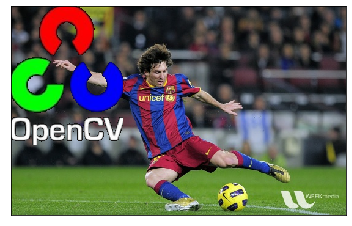

In [36]:
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('./01_data/messi5.jpg')
img2 = cv.imread('./01_data/opencv-logo.png')

# 从img1中提取与img2等大小的子图案roi
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
# 生成一个文字和图案部分为白色，背景全为黑色的mask
## 因为文字和图案部分的颜色值大于10， 所以通过threshold方法后，
## 它们都会全部转换成255（白色）， 而背景则维持黑色（0）
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
# 生成一个文字和图案部分为黑色，背景为白色的mask(mask_inv)
mask_inv = cv.bitwise_not(mask)

# 从roi中挖掉mask_inv的为0（黑色的文字和图案）的部分。
## bitwise_and用来合并两张图片中mask不为0（不是黑色）的部分。
img1_bg = cv.bitwise_and(roi, roi, mask = mask_inv)

# 从img2中抽取文字和图案
img2_fg = cv.bitwise_and(img2, img2, mask = mask)

# 合并img1_bg(背景部分)和img2_fg(前景部分)
dst = cv.add(img1_bg, img2_fg)
# 把合并后的子图片dst放回img1中
img1[:rows, :cols] = dst

plt.imshow(img1[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.show()